In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("/Volumes/workspace/default/netflix/netflix_titles.csv")
display(df.head())


show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,null,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
s2,TV Show,Blood & Water,null,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",null,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
s4,TV Show,Jailbirds New Orleans,null,null,null,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
s5,TV Show,Kota Factory,null,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


In [0]:
# Drop duplicates and fill missing values
df = df.drop_duplicates()
df = df.fillna("Unknown")

# Check cleaned data
print("Shape:", df.shape)
display(df.head())


Shape: (8807, 12)


show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


In [0]:
# 1. Title length
df["title_length"] = df["title"].apply(lambda x: len(str(x)))

# 2. Content length from 'duration'
df["duration_num"] = df["duration"].apply(lambda x: int(str(x).split()[0]) if str(x).split()[0].isdigit() else 0)
df["Content_Length_Category"] = pd.cut(df["duration_num"],
                                       bins=[0,60,100,200],
                                       labels=["Short","Medium","Long"],
                                       include_lowest=True)

# 3. Content type category
df["Content_Type_Category"] = df["type"].apply(lambda x: "Movie" if x == "Movie" else "TV Show")

display(df[["title","duration","Content_Length_Category","Content_Type_Category"]].head())


title,duration,Content_Length_Category,Content_Type_Category
Dick Johnson Is Dead,90 min,Medium,Movie
Blood & Water,2 Seasons,Short,TV Show
Ganglands,1 Season,Short,TV Show
Jailbirds New Orleans,1 Season,Short,TV Show
Kota Factory,2 Seasons,Short,TV Show


In [0]:
le = LabelEncoder()
df["Content_Length_Encoded"] = le.fit_transform(df["Content_Length_Category"].astype(str))
df["Content_Type_Category_Encoded"] = le.fit_transform(df["Content_Type_Category"].astype(str))
df["Type_Encoded"] = le.fit_transform(df["type"].astype(str))
display(df.head())


show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_length,duration_num,Content_Length_Category,Content_Type_Category,Content_Length_Encoded,Content_Type_Category_Encoded,Type_Encoded
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",20,90,Medium,Movie,1,0,0
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",13,2,Short,TV Show,2,1,1
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",9,1,Short,TV Show,2,1,1
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.",21,1,Short,TV Show,2,1,1
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.",12,2,Short,TV Show,2,1,1


In [0]:
# Step 5: Decision Tree Classification (Fixed – no data leakage)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ Use only independent, non-target-derived features
X = df[["release_year", "title_length", "Content_Length_Encoded"]]
y = df["Content_Type_Category_Encoded"]

# Shuffle to prevent same-order bias
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=6)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Results
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt), 3))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.953
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1214
           1       0.88      0.99      0.93       548

    accuracy                           0.95      1762
   macro avg       0.94      0.96      0.95      1762
weighted avg       0.96      0.95      0.95      1762



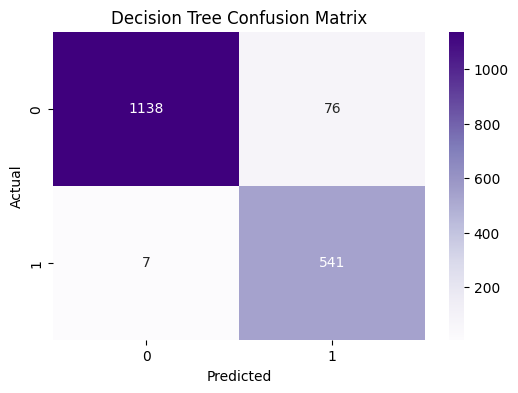

In [0]:
# Step 6: Decision Tree Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [0]:
# Step 7: Logistic Regression Classification (Fixed)
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1214
           1       0.88      0.97      0.92       548

    accuracy                           0.95      1762
   macro avg       0.93      0.96      0.94      1762
weighted avg       0.95      0.95      0.95      1762



In [0]:
# Step 8: Model Evaluation Summary
from sklearn.metrics import precision_score, recall_score, f1_score

for name, model, y_pred in [
    ("Decision Tree", dt_model, y_pred_dt),
    ("Logistic Regression", lr_model, y_pred_lr)
]:
    print(f"Model: {name}")
    print(" Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print(" Precision:", round(precision_score(y_test, y_pred, average='weighted'), 3))
    print(" Recall:", round(recall_score(y_test, y_pred, average='weighted'), 3))
    print(" F1 Score:", round(f1_score(y_test, y_pred, average='weighted'), 3))
    print("-" * 45)


Model: Decision Tree
 Accuracy: 0.953
 Precision: 0.957
 Recall: 0.953
 F1 Score: 0.954
---------------------------------------------
Model: Logistic Regression
 Accuracy: 0.95
 Precision: 0.953
 Recall: 0.95
 F1 Score: 0.951
---------------------------------------------


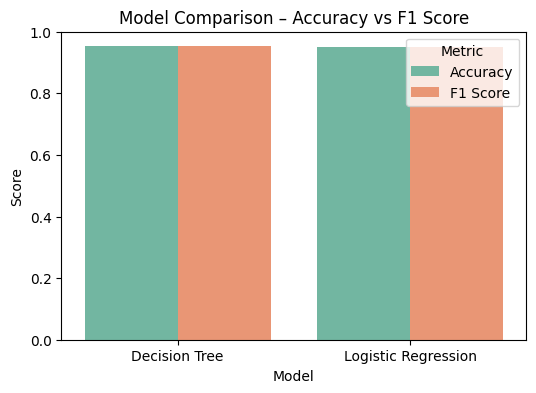

Model,Accuracy,F1 Score
Decision Tree,0.953,0.954
Logistic Regression,0.95,0.951


In [0]:
# Step 9: Compare Model Performance Visually
import matplotlib.pyplot as plt
import seaborn as sns

# Collect metrics
metrics = {
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "F1 Score": f1_score(y_test, y_pred_dt, average='weighted')
    },
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_lr),
        "F1 Score": f1_score(y_test, y_pred_lr, average='weighted')
    }
}

# Convert to DataFrame for plotting
metrics_df = pd.DataFrame(metrics).T.reset_index().rename(columns={"index": "Model"})

# Plot side-by-side bars
plt.figure(figsize=(6,4))
sns.barplot(data=metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric", palette="Set2")
plt.title("Model Comparison – Accuracy vs F1 Score")
plt.ylim(0,1)
plt.show()

# Display numeric table too
display(metrics_df.round(3))


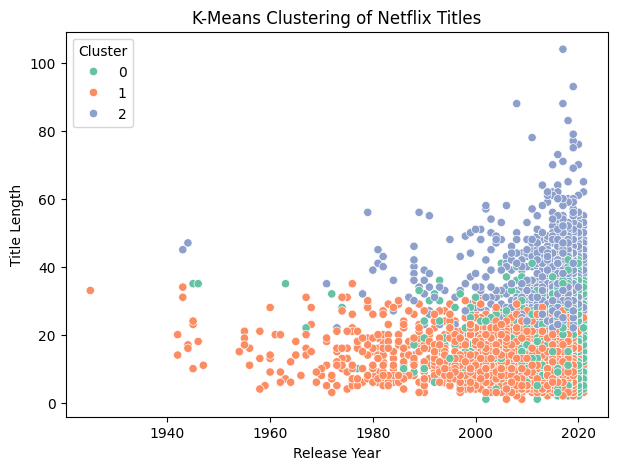

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X_scaled)
df["Cluster"] = kmeans.labels_

plt.figure(figsize=(7,5))
sns.scatterplot(x=df["release_year"],y=df["title_length"],hue=df["Cluster"],palette="Set2")
plt.title("K-Means Clustering of Netflix Titles")
plt.xlabel("Release Year")
plt.ylabel("Title Length")
plt.show()


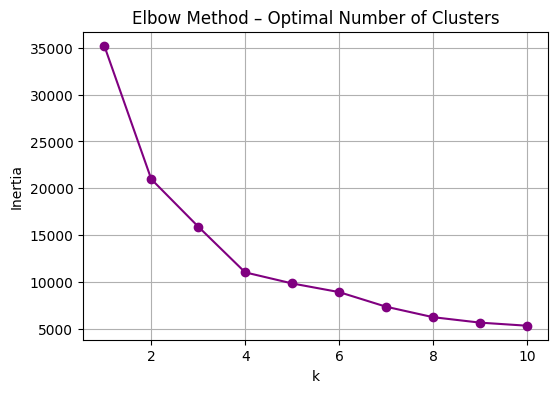

In [0]:
inertia=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11),inertia,marker="o",color="purple")
plt.title("Elbow Method – Optimal Number of Clusters")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


Silhouette Score: 0.4457925158606235


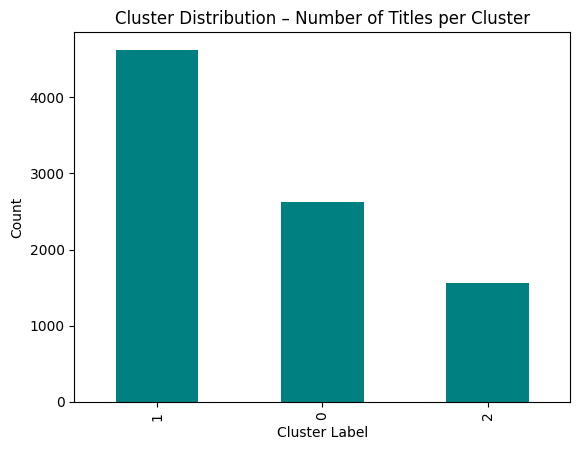

In [0]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled,df["Cluster"])
print("Silhouette Score:",sil_score)

df["Cluster"].value_counts().plot(kind="bar",color="teal")
plt.title("Cluster Distribution – Number of Titles per Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.show()


/home/spark-d8ebef08-af84-460f-bfe4-8e/.ipykernel/2485/command-7428944671260345-2497493089:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values,y=top_countries.index,palette="mako")


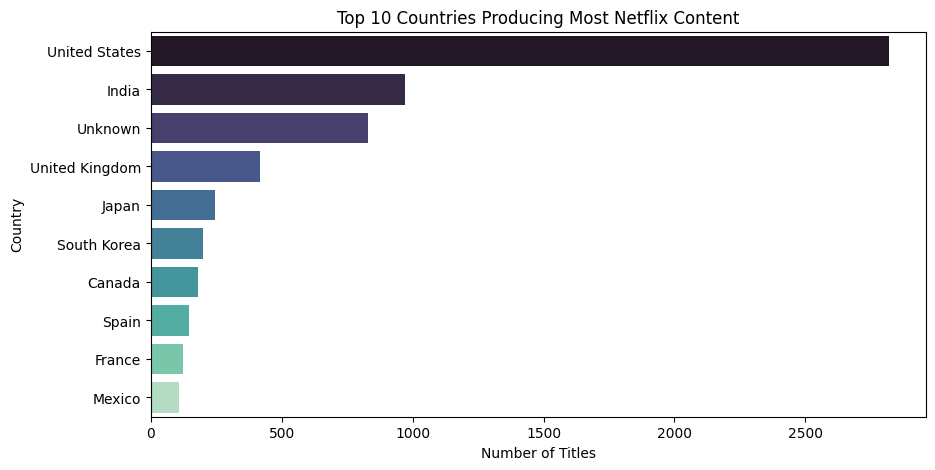

In [0]:
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values,y=top_countries.index,palette="mako")
plt.title("Top 10 Countries Producing Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


/home/spark-d8ebef08-af84-460f-bfe4-8e/.ipykernel/2485/command-7428944671260346-2436740002:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts),y=list(genres),palette="rocket")


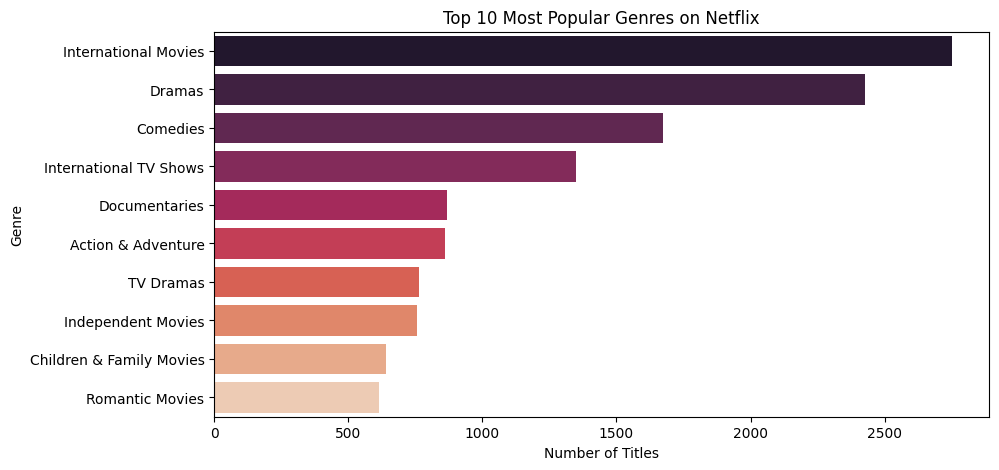

In [0]:
from collections import Counter

genre_list = df["listed_in"].dropna().apply(lambda x: x.split(", "))
all_genres = [g for sublist in genre_list for g in sublist]
genre_counts = Counter(all_genres).most_common(10)
genres,counts = zip(*genre_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=list(counts),y=list(genres),palette="rocket")
plt.title("Top 10 Most Popular Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()
